In [1]:
#Perceptron algorithm

In [2]:
from sklearn import datasets
iris=datasets.load_iris()

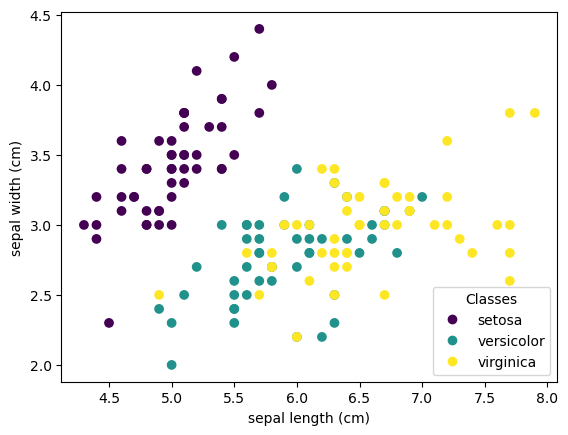

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [4]:
iris=pd.read_csv("iris.csv")

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
import matplotlib.pyplot as plt

In [8]:
y=iris.iloc[0:100,4].values #species columns
y=np.where(y=='Iris-setosa',-1,1) #convert to binary setosa  and vertosa
x=iris.iloc[0:100,[0,2]].values #sepal length and petal length

In [9]:
import numpy as np

class Perceptron:
    def __init__(self, eta=0.1, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data"""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
            
    

In [10]:
ppn = CustomPerceptron(eta=0.1, n_iter=10)
ppn.fit(x, y)


NameError: name 'CustomPerceptron' is not defined

In [ ]:


plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Misclassifications')
plt.title('Perceptron Training Progress')
plt.show()


In [ ]:
###vinding angle between two vectors
v1=np.array([1,2,3])
v2=0.5*v1
np.arccos(v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

In [ ]:
iris.tail()

In [ ]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
##selecting setosa and versicolor
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',0,1)
##extracting sepal and petal length
x=df.iloc[0:100,[0,2]].values
#plotting data
plt.scatter(x[:50,0],x[:50,1],
            color='red',marker='o',label='Setosa')
plt.scatter(x[50:100,0],x[50:100,1],
            color='blue',marker='s',label='versicolor')
plt.xlabel('Sepal length[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='upper left')
plt.show()


In [ ]:
ppn=Perceptron(eta=0.1,n_iter=10)
ppn.fit(x,y)
plt.plot(range(1,len(ppn.errors_)+1),
         ppn.errors_,marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y, classifier, resolution=0.02):
    ##setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plotting the decision surface
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1  # Changed X to x
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1  # Changed X to x
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Moved the plotting class examples inside the function
    # Make sure x is 2D array before indexing with two dimensions
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0],  # This assumes x is a 2D array
                    y=x[y==cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class{cl}',
                    edgecolor='black')

In [ ]:
plot_decision_regions(x,y,classifier=ppn)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# ! git add Machine_learning.ipynb
# !git commit -m "22/07/2025"
# !git push

In [11]:
##implementing Adaline in python

In [12]:
import numpy as np

In [22]:
class AdalineGD:
    def __init__(self,eta=0.01,n_iter=50):
        self.eta=eta
        self.n_iter=n_iter
    def fit(self,x,y):
        self.w_=np.zeros(1+x.shape[1])  #initial weight
        self.cost_=[]

        for i in range(self.n_iter):
            net_input=self.net_input(x)
            output=self.activation(net_input)
            errors=y-output

#gradient descent weight updated rule
            self.w_[1:] += self.eta * x.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()

            cost = (errors**2).sum() / 2.0   # Sum of squared errors (MSE)
            self.cost_.append(cost)
        return self
    def net_input(self,x):
        return np.dot(x,self.w_[1:])+self.w_[0]

    def activation(self, x):
        return x  # Identity function

    def predict(self, x):
        return np.where(self.activation(self.net_input(x)) >= 0.0, 1, -1)

    
            
        

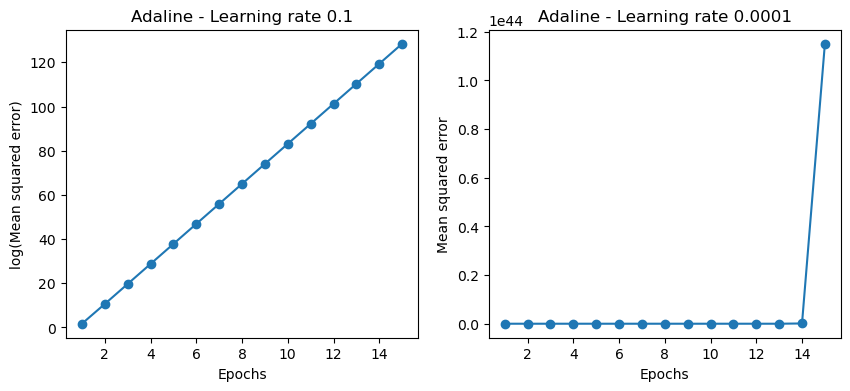

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Assuming the correct attribute is 'cost_' instead of 'losses_'
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(x, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),  # Changed losses_ to cost_
           np.log10(ada1.cost_), marker='o')  # Changed losses_ to cost_
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(x, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),  # Changed losses_ to cost_
           ada2.cost_, marker='o')  # Changed losses_ to cost_
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()